<a href="https://colab.research.google.com/github/songiangvn/AI-Machine-Learning-for-Coders/blob/main/Chapter_2_Introduction_to_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: Introduction to Computer Vision

Computer vision, where we will have a model
 learn how to recognize content in pictures so it can “see” what’s in them

## In this Chapter, we will use the Fashion MNIST DataSet

Fashion MNIST contains images of
 10 different types of clothing. You can see an example of the contents of the dataset in
 Figure 2-2. Here, three lines are dedicated to each clothing item type

 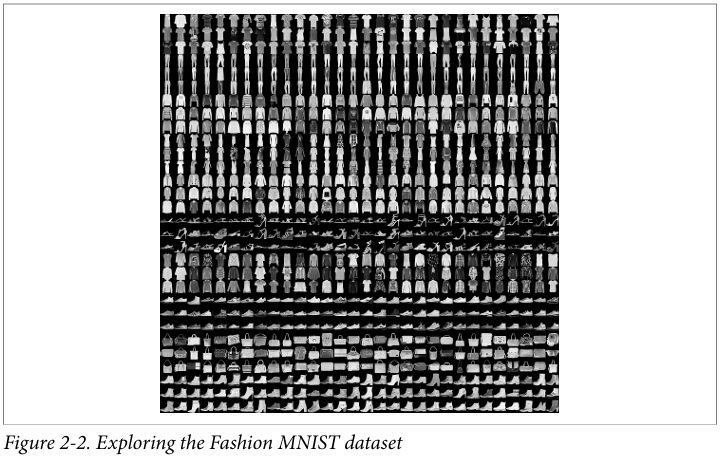

### Properties of Data

Each picture consists of a certain
 number of pixels with values between 0 and 255(monochrome). This makes the dataset simpler to
 manage.
 You can see a closeup of a particular image from the dataset in Figure 2-3

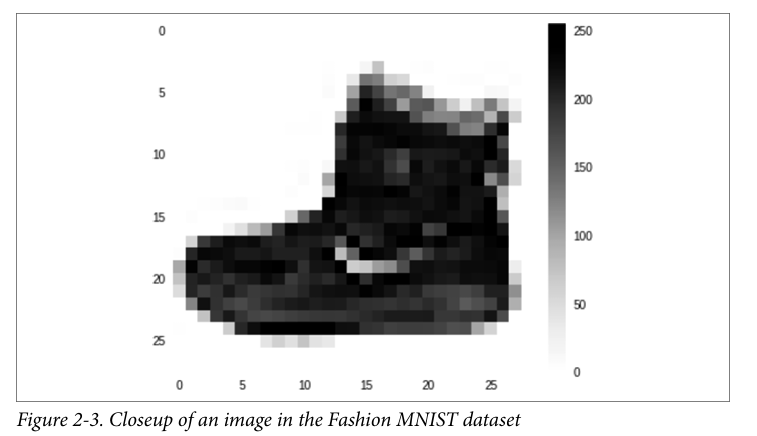


Each of our images is a set of 784 values (28 × 28) between 0 and 255. They can be
 our X. We know that we have 10 different types of images in our dataset, so let’s con
sider them to be our Y. Now we want to learn what the function looks like where Y is
 a function of X

## Neurons of Vision

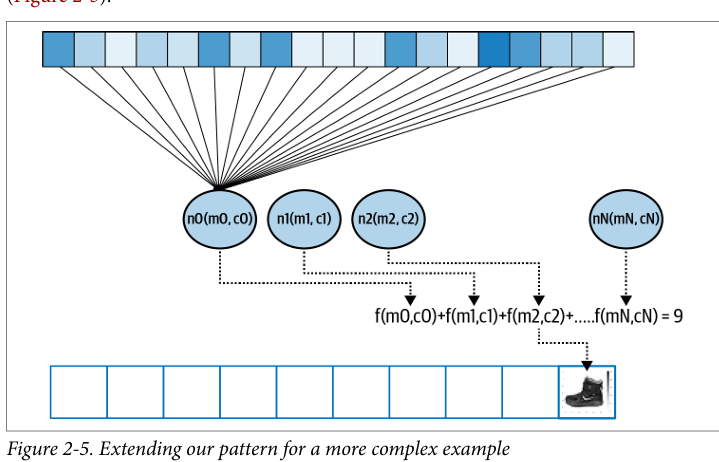

 What we can do is have several neurons working together. Each of these will learn
 parameters, and when we have a combined function of all of these parameters work
ing together, we can see if we can match that pattern to our desired answer
 (Figure 2-5)

Neuron 0 will contain the value of the probability that the pixels add up to label 0,
 neuron 1 for label 1, etc.

## Designing the Neural Network

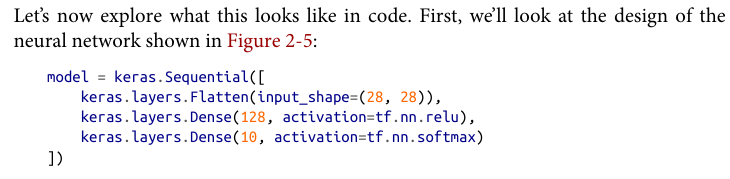

Ở đây có 3 layer giống như ở trong hình trên.

- Flatten: not a layer of neurons, but an input layer specification. Flatten takes that "square" value(28x28-2D) and turns it into a line(1D array)
- Dense: Hidden layer, a layer of neurons. Ở đây hidden layer có 128 neurons. No fixed rule for the number of neurons to use, more neurons means it will run more slowly(More neurons cũng có thể dẫn tới overfitting - nếu không được kiểm soát kỹ). On the other hand, fewer neurons means
 that the model might not have sufficient parameters to learn.
- Chú ý: Để xem nên thiết kế bao nhiêu neurons thì cần"some experimentation over time to pick the right values" - cái này gọi là "hyperparameter tuning".
 - Tham số (parameters): Là những giá trị bên trong mô hình, được học thông qua quá trình huấn luyện.
 - Siêu tham số (hyperparameters): Là những giá trị mà bạn phải thiết lập trước, ảnh hưởng đến cách mô hình học.
 - Hyperparameter tuning: Là quá trình thử nghiệm và chọn giá trị siêu tham số tốt nhất để tối ưu hóa hiệu suất mô hình.
- Activation function - Relu: Activation function là code will excecute on each neuron in the layer f(x) = max(x, 0)
- Dense Layer 2: Output layer, 10 neurons vì có 10 classes đầu ra.  Each of these neurons will end up with a probability that
 the input pixels match that class, so our job is to determine which one has the highest
 value. We could loop through them to pick that value, but the softmax activation
 function does that for us
  - Hàm Softmax là một hàm kích hoạt thường được sử dụng trong các bài toán phân loại nhiều lớp (multi-class classification). Nó chuyển đổi một vectơ các giá trị thực thành một vectơ các xác suất, sao cho tổng của các xác suất bằng 1.
  - Trong mạng nơ-ron, Softmax thường được sử dụng ở lớp cuối cùng để dự đoán xác suất của các lớp.

# Complete Model

## Data preprocessing

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


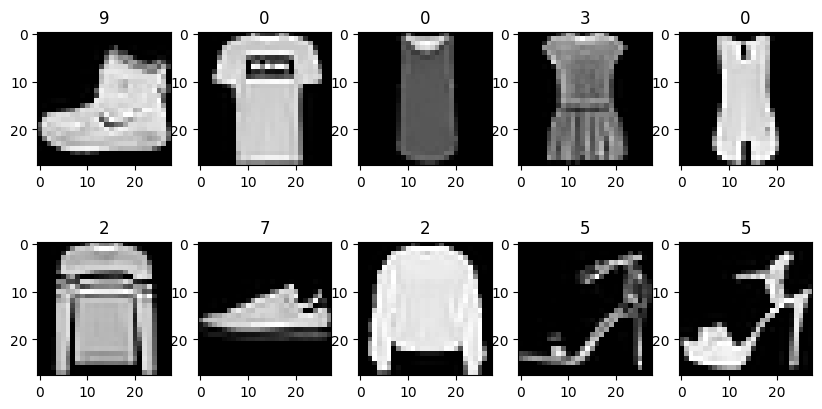

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_data = tf.keras.datasets.fashion_mnist

# Load bộ dữ liệu có sẵn của Keras
(train_images, train_labels), (test_images, test_lables) = fashion_data.load_data()

# Trực quan hóa 10 ảnh đầu tiên lên cùng với nhãn của chúng
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(train_images[i], cmap = 'gray')
    axs[i].set_title(train_labels[i])
plt.show()

Các nhãn được liệt kê bằng số. Bằng đánh nhãn của từng loại đây:

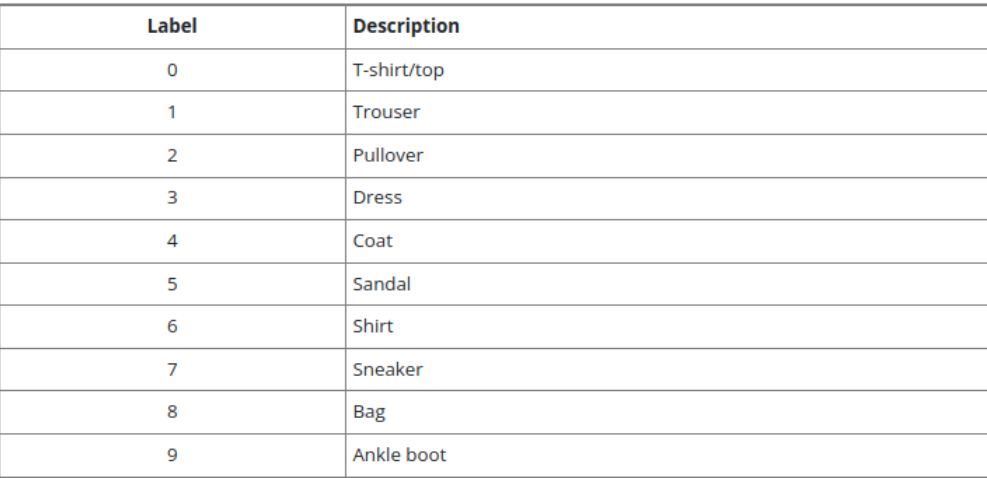

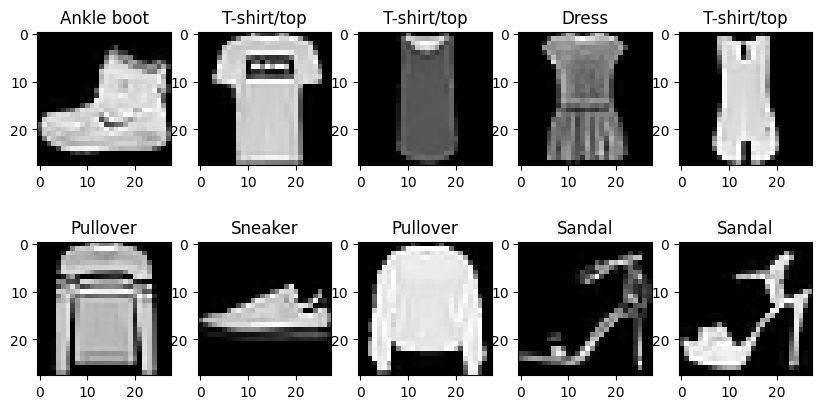

In [3]:
# Khởi tạo danh sách mapping cho các nhãn.
idx2label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Tiến hành trực quan hóa lại với tên nhãn.
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(train_images[i], cmap = 'gray')
    axs[i].set_title(idx2label[train_labels[i]])
plt.show()


Đưa ra value của pixel các bức ảnh, nếu to thì tiến hành normalizing chúng

In [4]:
# Xem kích thước các bức ảnh
img1 = train_images[0]
shape_img1 = img1.shape
print('Kích thước ảnh(pixel): ',shape_img1)

# Xem giá trị pixel lớn nhất của bức ảnh hiện tại.
print('Giá trị pixel lớn nhất: ', np.max(img1))

# Xem giá trị pixel nhỏ nhất của bức ảnh hiện tại.
print('Giá trị pixel nhỏ nhất: ', np.min(img1))

Kích thước ảnh(pixel):  (28, 28)
Giá trị pixel lớn nhất:  255
Giá trị pixel nhỏ nhất:  0


### Normalizing the image

- Recall that all of the pixels in our images are grayscale, with values between 0 and 255. Dividing by 255 thus ensures that every pixel is represented by a number between 0 and 1 instead. This process is called normalizing the image.
- Bear in mind when training a neural network in Tensor
Flow that normalization will improve performance.

In [7]:
train_images = train_images / 255
test_images = test_images / 255

## Define Neural Network

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu, softmax

Module tensorflow.nn cung cấp các hàm toán học và công cụ cần thiết để xây dựng và vận hành mạng nơ-ron (neural network). Tên nn là viết tắt của neural networks.

### Cách khởi tạo mô hình 1

In [7]:
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(128, activation=relu),
                    Dense(10, activation=softmax)
                    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Cách khởi tạo mô hình 2 - Dùng add để add thêm các layer vào

In [8]:
# Khởi tạo kiến trúc mô hình
model = Sequential()

# Ở đây mình có sử dụng một cú pháp khác thay vì truyền vào danh sách các lớp
# mọi người cũng có thể thêm các lớp vào mô hình như vậy nha.
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = relu))
model.add(Dense(10, activation = softmax)) # Fully connected.

Compile the model by specify loss function and optimizer

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

- One major difference between this model and the one we cre
ated in Chapter 1 is that instead of us trying to predict a single number, here we’re
 picking a category. Our item of clothing will belong to 1 of 10 categories of clothing,
 and thus using a categorical loss function is the way to go. Sparse categorical cross
 entropy is a good choice.

- adam optimizer: evolution of the sgd(stochastic gradient descent)

## Model Training

In [11]:
# Huần luyện mô hình và lưu lại quá trình trên biến history
history = model.fit(train_images, train_labels, epochs= 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7811 - loss: 0.6322
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8597 - loss: 0.3917
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8792 - loss: 0.3403
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8870 - loss: 0.3109
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8904 - loss: 0.3001


### Loss Curve: Biểu đồ hàm mất mát (loss function).
- Trục x: Epochs (số vòng lặp huấn luyện).
- Trục y: Giá trị của hàm mất mát (loss).

Thường được sử dụng để theo dõi xem mô hình đang học tốt hơn hay không qua từng epoch.

### Accuracy Curve: Biểu đồ độ chính xác (accuracy function).
- Trục x: Epochs.
- Trục y: Độ chính xác (accuracy) đạt được.

Biểu đồ này cho thấy hiệu suất của mô hình khi dự đoán đúng trên tập dữ liệu huấn luyện và kiểm tra.

### Cách sử dụng:
- Loss Curve thường dùng để kiểm tra xem mô hình có bị underfitting hoặc overfitting không.
- Accuracy Curve cho biết mức độ cải thiện hiệu suất dự đoán của mô hình.

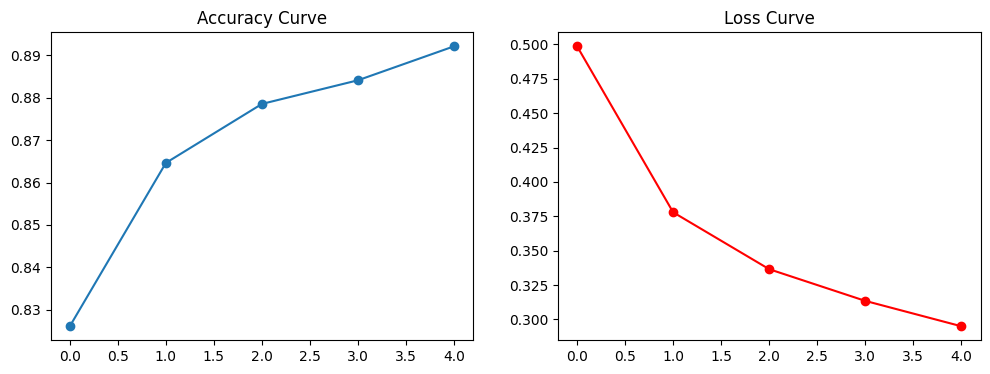

In [12]:
# Vẽ 2 biểu đồ quá trình huấn luyện mô hình dựa trên accuracy và loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history.history['accuracy'], marker = 'o')
axs[0].set_title('Accuracy Curve')
axs[1].plot(history.history['loss'], marker = 'o', color = 'red')
axs[1].set_title('Loss Curve')
plt.show()

In [13]:
# Kết quả đánh giá cuối cùng của mô hình sau khi train xong
train_acc = history.history['accuracy'][-1]
print("Độ chính xác trên tập huấn luyện: ", train_acc)
train_loss = history.history['loss'][-1]
print("Độ mất mát trên tập huấn luyện: ", train_loss)

Độ chính xác trên tập huấn luyện:  0.8921499848365784
Độ mất mát trên tập huấn luyện:  0.29495033621788025


Note that it’s now reporting accuracy. So in this case, using the training data, our
 model ended up with an accuracy of about 89% after only five epochs

In [15]:
# Đánh giá mô hình trên tập kiểm tra
result = model.evaluate(test_images, test_lables)
print("Kết quả đánh giá mô hình: ", result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8788 - loss: 0.3367
Kết quả đánh giá mô hình:  [0.3415011167526245, 0.8791000247001648]


 In this case the accuracy of the model was 87.88%, which isn’t bad considering we
 only trained it for five epochs.

  You’re probably wondering why the accuracy is lower for the test data than it is for the
 training data. This is very commonly seen, and when you think about it, it makes
 sense: the neural network only really knows how to match the inputs it has been
 trained on with the outputs for those values. Our hope is that, given enough data, it
 will be able to generalize from the examples it has seen, “learning” what a shoe or a
 dress looks like. But there will always be examples of items that it hasn’t seen that are
 sufficiently different from what it has to confuse it.

### Exploring Model Output

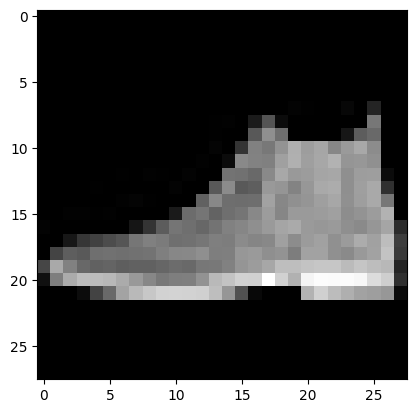

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Kết quả dự đoán:  [[4.6461869e-06 7.0418885e-08 2.7039925e-05 1.9700838e-07 4.1165213e-06
  5.3292909e-03 4.2134605e-05 2.6193330e-01 3.3495788e-04 7.3232418e-01]]
Nhãn dự đoán dạng số:  9
Nhãn dự đoán:  Ankle boot
Nhãn thực tế:  Ankle boot


In [16]:
# Xem thử kết quả dự đoán, ở đây mình sẽ lấy ảnh thứ nhất trong tập test
img_test = test_images[0]
plt.imshow(img_test, cmap = 'gray')
plt.show()

# Dự đoán kết quả cho hình ảnh
predicted = model.predict(np.array([img_test]))

# Kết quả dự đoán ở đây trả về sẽ là một mảng 10 phần tử đại diện cho 10 đồ vật với giá trị là độ chính xác của mỗi loại.
print("Kết quả dự đoán: ", predicted)

# Chúng ta sẽ dùng hàm dưới đây để lấy ra vị trí đồ vật có độ chính xác cao nhất.
idx_label =  np.argmax(predicted)

print("Nhãn dự đoán dạng số: ", idx_label)
print("Nhãn dự đoán: ", idx2label[idx_label])
print("Nhãn thực tế: ", idx2label[test_lables[0]])

You’ll notice that the classification gives us back an array of values. These are the val
ues of the 10 output neurons. The label is the actual label for the item of clothing, in
 this case 9. Take a look through the array—you’ll see that some of the values are very
 small, and the last one (array index 9) is the largest by far. These are the probabilities
 that the image matches the label at that particular index. So, what the neural network
 is reporting is that there’s a 73.3% chance that the item of clothing at index 0 is label 9.
 We know that it’s label 9, so it got it right

## Training model với số epochs là 50

Cái train ở đoạn này sai do quên chưa run lại đoạn normalization nhưng không sao vì ở dưới có chạy lại + với Stopping Training với Early Stopping để tránh overfitting rồi

In [4]:
model1 = Sequential()

model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128, activation=relu))
model1.add(Dense(10, activation=softmax))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6753 - loss: 9.6579
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7481 - loss: 0.6976
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7932 - loss: 0.5835
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8069 - loss: 0.5554
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8171 - loss: 0.5183
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8265 - loss: 0.4950
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8321 - loss: 0.4795
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8371 - loss: 0.4687
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8389 - loss: 0.4685
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8347 - loss: 0.4818
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8372 - loss: 0.4715
Epoch 12/50
1875/1875 ━━━━━━━

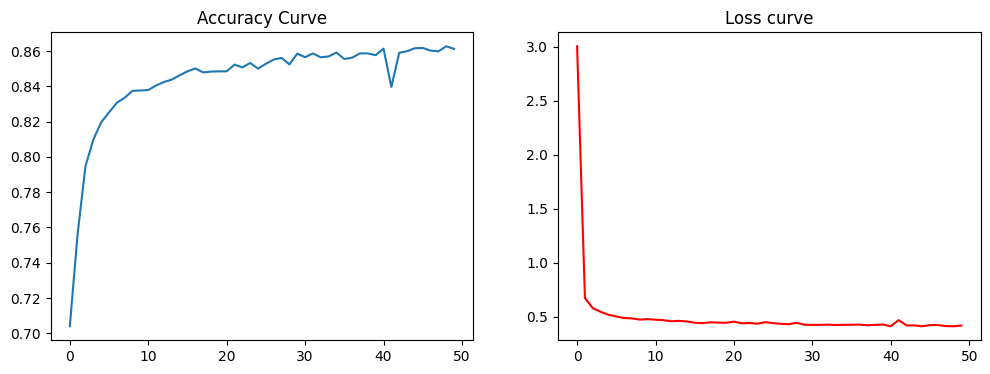

In [5]:
# Vẽ 2 biểu đồ quá trình huấn luyện mô hình dựa trên accuracy và loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history1.history['accuracy'])
axs[0].set_title('Accuracy Curve')
axs[1].plot(history1.history['loss'], color = 'red')
axs[1].set_title('Loss curve')
plt.show()


In [6]:
# Đánh giá mô hình
result1 = model1.evaluate(test_images, test_lables)
print("Kết quả đánh giá mô hình: ", result1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8305 - loss: 0.6077
Kết quả đánh giá mô hình:  [0.6300703883171082, 0.8248000144958496]


Khi train với 50 epoch có vẻ độ chính xác được cải thiện cả với tập training set và test set

Trong một vài trường hợp khác, mô hình có thể tệ hơn nhiều, lúc này chúng ta sẽ xét đến hai khái niệm là overfitting và underfitting:

- Hiểu đơn giản là khi kết quả đánh giá trên tập kiểm tra tệ hơn nhiều so với tập huấn luyện, độ chính xác trên tập huấn luyện cao trong khi trên tập kiểm ta lại vô cùng thấp, ta gọi tình trạng này là overfitting.

- Còn khi trên kết quả đánh giá cả trên tập huấn luyện và tập kiểm tra đều vô cùng tệ, lúc này ta gọi là underfitting.

 In fact, the divergence in the
 accuracy numbers shows that it has become overspecialized to the training data, a
 process often called overfitting. As you build more neural networks this is something
 to watch out for, and as you go through this book you’ll learn a number of techniques
 to avoid it.

## Stopping Training - Early Stopping

 For example, if we want to train until the model is at 95% accuracy on the training set, without knowing how many epochs that will take, how
 could we do that?

Khái niệm về 3 tập data có thể xuất hiện trong quá trình làm việc:

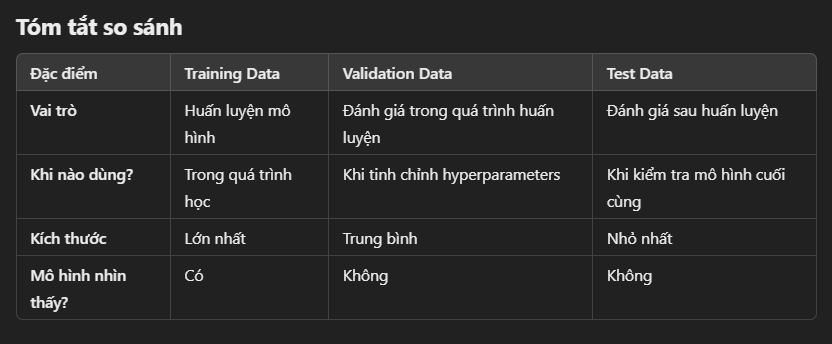

### Use callback on the training

When training, at the end of every epoch, the callback function will be called. So at
 the end of each epoch you’ll check

### Hai cách sử dụng callback khác nhau

#### Cách 1: Train cho tới khi accuracy đạt tới 1 ngưỡng nhất định, định nghĩa 1 class myCallback và định nghĩa 1 hàm on_epoch_end


In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [15]:

fashion_data = tf.keras.datasets.fashion_mnist

# Load bộ dữ liệu có sẵn của Keras
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()
training_images=train_images/255.0
test_images=test_images/255.0

In [16]:
model3 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model3.fit(training_images, train_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7822 - loss: 0.6259
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8600 - loss: 0.3822
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8746 - loss: 0.3395
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8835 - loss: 0.3172
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8894 - loss: 0.3005
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8954 - loss: 0.2799
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9000 - loss: 0.2675
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9030 - loss: 0.2603
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9076 - loss: 0.2516
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9097 - loss: 0.2434
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9147 - loss: 0.2291
Epoch 12/50
1875/1875 ━━━━━

After about 34 epochs you’ll see that your
 training will end, because the training has hit 95% accuracy

#### Cách 2:
Trong một số trường hợp, việc huấn luyện mô hình nhiều đôi khi lại không hiệu quả và có thể dẫn đến overfitting. Do đó ta sẽ sử dụng phương pháp "early stopping" để dừng sớm quá trình huấn luyện thay vì chạy hết toàn bộ, giúp tiết kiệm thời gian và tài nguyên hơn.

Nguyên lý hoạt động của "early stopping" rất đơn giản, nếu trong n lần huấn luyện liên tiếp, mô hình không cải thiện thì tiến hành dừng lại quá trình huấn luyện và lấy ra mô hình tốt nhất.

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

# Khởi tạo EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',        # Giám sát lỗi trên tập validation - giám sát val_loss
    patience=5,                # Số epoch tối đa không cải thiện để dừng huấn luyện
    restore_best_weights=True  # Khôi phục lại mô hình tốt nhất
)

# Khởi tạo kiến trúc mô hình
model2 = Sequential()

# Ở đây mình có sử dụng một cú pháp khác thay vì truyền vào danh sách các lớp
# mọi người cũng có thể thêm các lớp vào mô hình như vậy nha.
model2.add(Flatten(input_shape = (28, 28)))
model2.add(Dense(128, activation = relu))
model2.add(Dense(10, activation = softmax)) # Fully connected.

# Định nghĩa hàm tối ưu và hàm mất mát.
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Huấn luyện mô hình với callback EarlyStopping
history2 = model2.fit(
    train_images,
    train_labels,
    epochs=50,
    validation_data=(test_images, test_lables),  # Thêm dữ liệu validation, vì ở đây mình không chia val nên tạm lấy test
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7782 - loss: 0.6381 - val_accuracy: 0.8460 - val_loss: 0.4370
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8623 - loss: 0.3824 - val_accuracy: 0.8596 - val_loss: 0.3864
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8745 - loss: 0.3412 - val_accuracy: 0.8635 - val_loss: 0.3836
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8860 - loss: 0.3151 - val_accuracy: 0.8740 - val_loss: 0.3513
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8899 - loss: 0.2983 - val_accuracy: 0.8749 - val_loss: 0.3460
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8928 - loss: 0.2829 - val_accuracy: 0.8800 - val_loss: 0.3386
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8993 - loss: 0.2651 - val_accuracy: 0.8780 - val_loss: 0.3492
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9037 - loss: 0.25

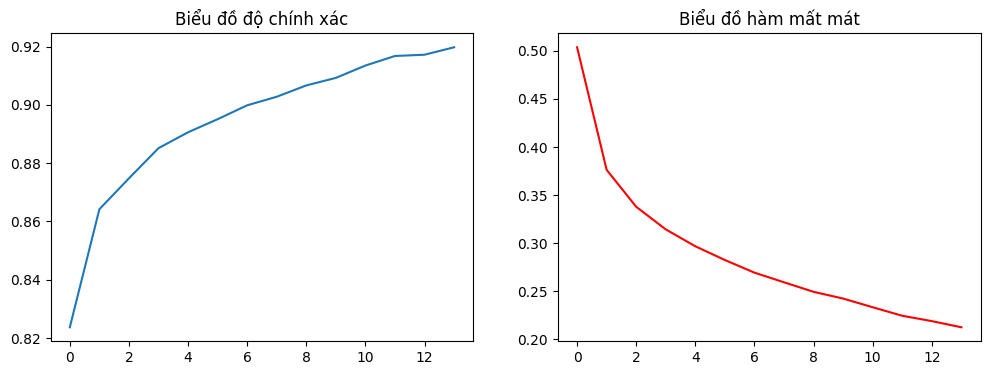

In [9]:
# Vẽ 2 biểu đồ quá trình huấn luyện mô hình dựa trên accuracy và loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history2.history['accuracy'])
axs[0].set_title('Biểu đồ độ chính xác')
axs[1].plot(history2.history['loss'], color = 'red')
axs[1].set_title('Biểu đồ hàm mất mát')
plt.show()


In [10]:
# Kết quả đánh giá cuối cùng của mô hình sau khi train xong
train_acc = history2.history['accuracy'][-1]
print("Độ chính xác trên tập huấn luyện: ", train_acc)
train_loss = history2.history['loss'][-1]
print("Độ mất mát trên tập huấn luyện: ", train_loss)

Độ chính xác trên tập huấn luyện:  0.9197333455085754
Độ mất mát trên tập huấn luyện:  0.2121274620294571


In [12]:
# Đánh giá mô hình trên tập kiểm tra
result2 = model2.evaluate(test_images, test_lables)
print("Kết quả đánh giá mô hình: ", result2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.3286
Kết quả đánh giá mô hình:  [0.3274717926979065, 0.883899986743927]


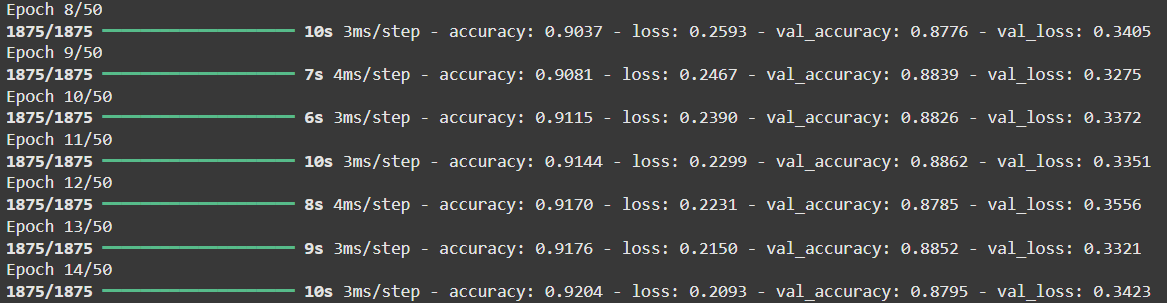

Bạn có thể thấy rằng từ epoch 9 đến epoch 14, giá trị val_loss không giảm liên tục và dao động xung quanh giá trị từ 0.3321 đến 0.556. Điều này cho thấy rằng mô hình không còn cải thiện rõ ràng độ mất mát trên tập val(trong trường hợp của chúng ta là test) tại epochs từ [10-14] nữa. Kết quả val_loss ở epoch 9 không còn giảm nữa do đó ta dừng quá trình huấn luyện và chọn mô hình tốt nhất ở tại epoch 9.

Dưới đây là các từ khóa để các bạn có thể ôn lại hoặc tìm hiểu sâu hơn nha:

- Hàm kích hoạt Softmax, Relu.
- Hàm tối ưu Adam.
- Hàm mất mát Cross Entropy.
- Khái niệm về tập xác nhận(validation), mối quan hệ của nó với tập huấn luyện(train) và tập kiểm tra(test).
- Phương pháp dừng sớm(Early stoping).